In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

from scipy.stats import ttest_ind

# Display the first few rows of the DataFrame
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [2]:
# Check the data types of all columns
df.dtypes

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [3]:
# Check for missing values
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [4]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

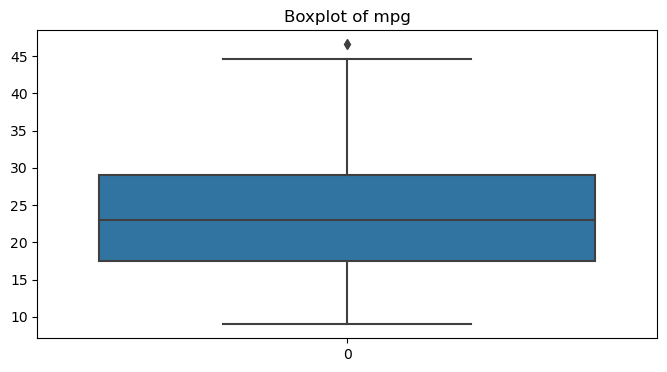

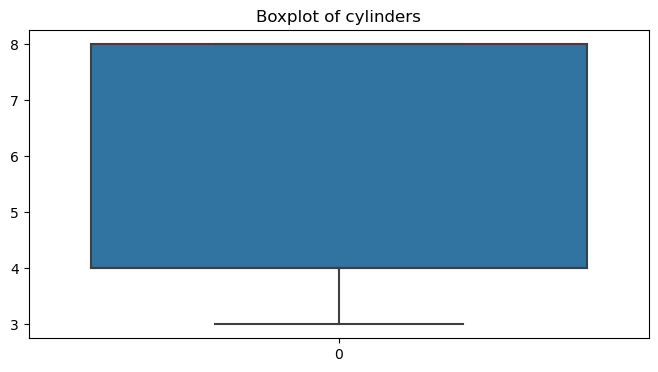

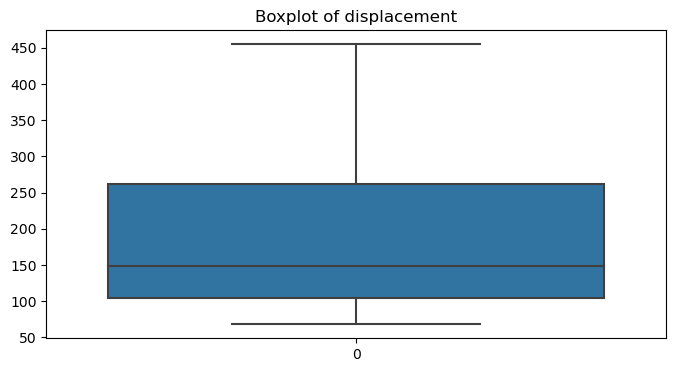

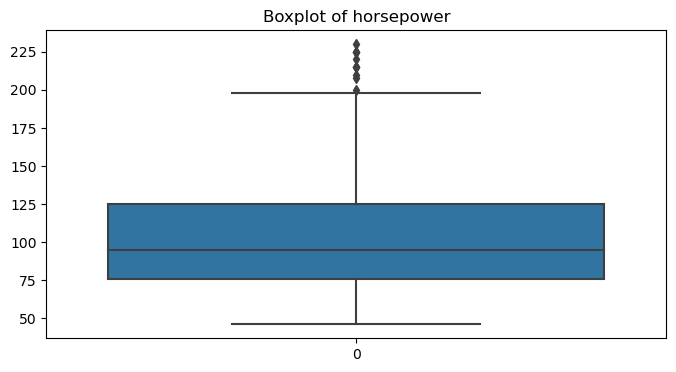

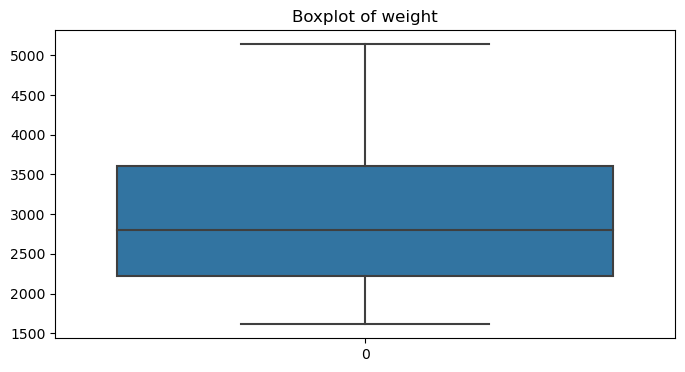

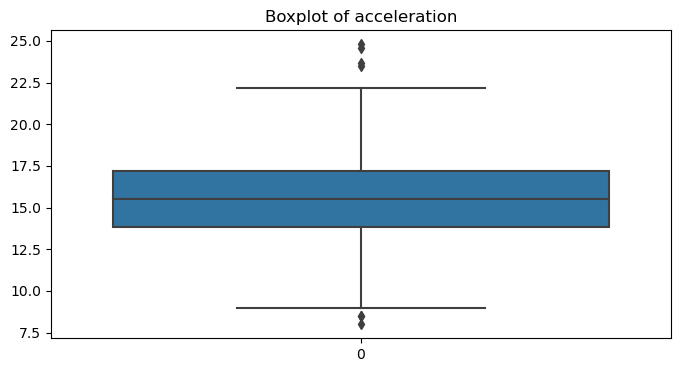

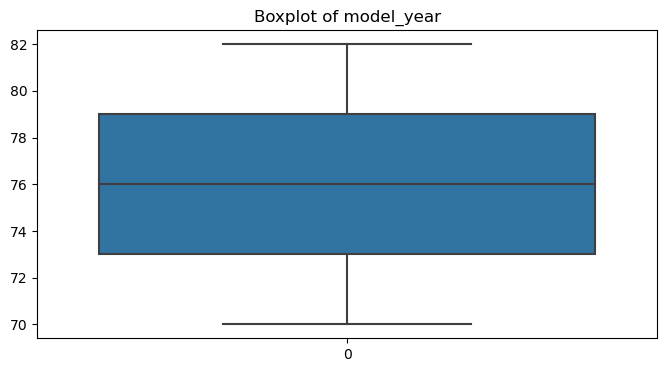

In [5]:
# List of numerical columns
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [6]:
# Handle outliers in 'horsepower'
# First, calculate the IQR of 'horsepower'
Q1_hp = df['horsepower'].quantile(0.25)
Q3_hp = df['horsepower'].quantile(0.75)
IQR_hp = Q3_hp - Q1_hp

# Define the upper and lower bounds for outliers
lower_bound_hp = Q1_hp - 1.5 * IQR_hp
upper_bound_hp = Q3_hp + 1.5 * IQR_hp

# Cap outliers
df['horsepower'] = df['horsepower'].clip(lower=lower_bound_hp, upper=upper_bound_hp)

# Repeat the process for 'weight'
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

df['weight'] = df['weight'].clip(lower=lower_bound_weight, upper=upper_bound_weight)

In [7]:
# Feature engineering
# Create a new feature 'hp_to_weight' that is the ratio of horsepower to weight
df['hp_to_weight'] = df['horsepower'] / df['weight']

In [8]:
# Check the first few rows of the DataFrame to confirm changes
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_to_weight
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa,0.037100
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa,0.044679
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa,0.043655
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa,0.043694
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa,0.040591


# Univariate Analysis

In [9]:
# Generate descriptive statistics for numerical variables
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,hp_to_weight
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.955569,2970.424623,15.568090,76.010050,0.034840
std,7.815984,1.701004,104.269838,36.748423,846.841774,2.757689,3.697627,0.005747
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.020557
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.030965
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,0.034365
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,0.038168
max,46.600000,8.000000,455.000000,198.500000,5140.000000,24.800000,82.000000,0.064323


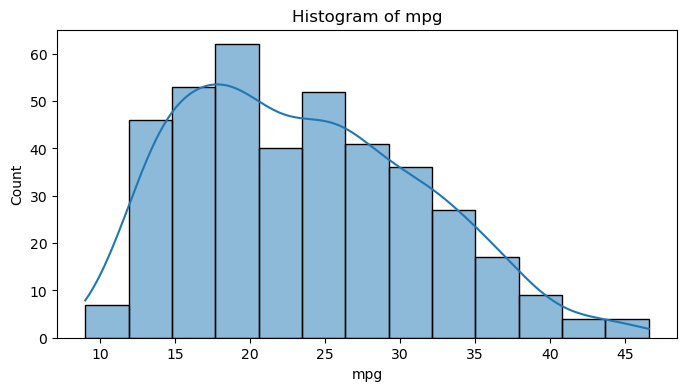

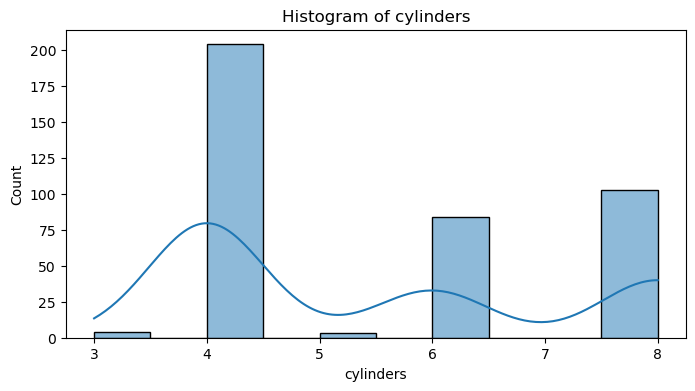

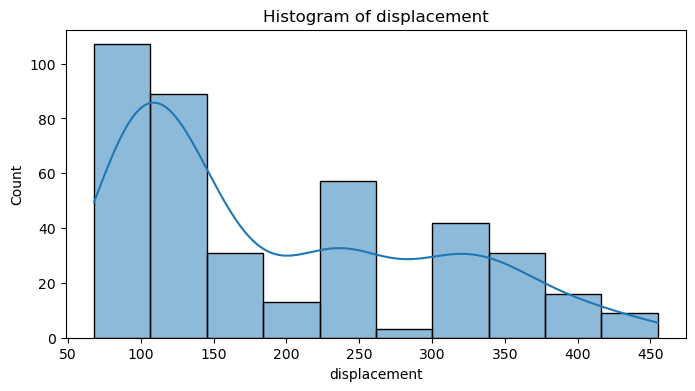

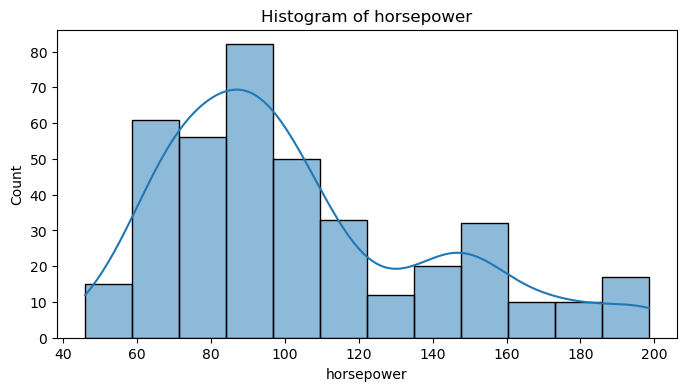

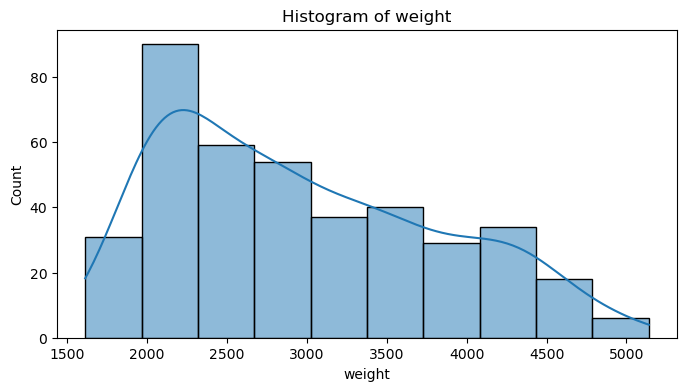

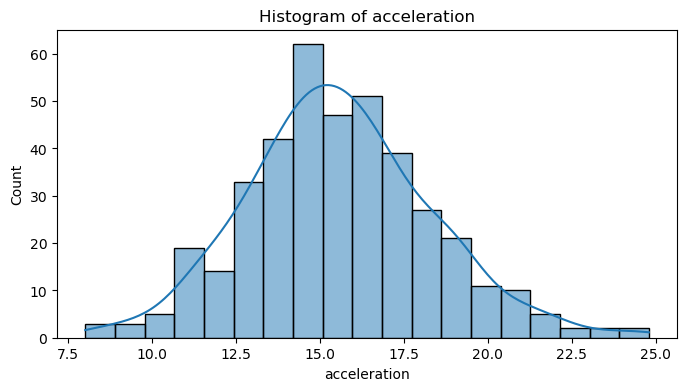

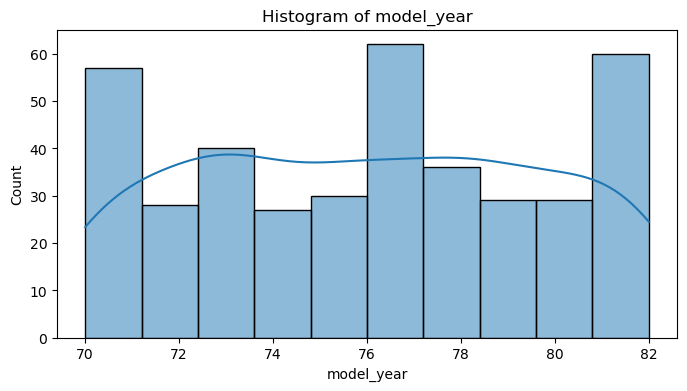

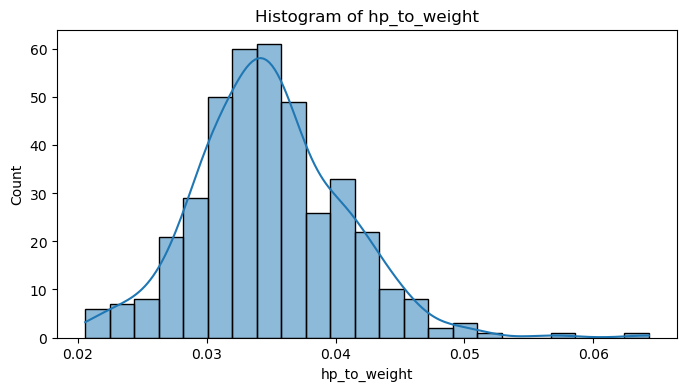

In [10]:
# Generate histograms for numerical variables
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'hp_to_weight']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

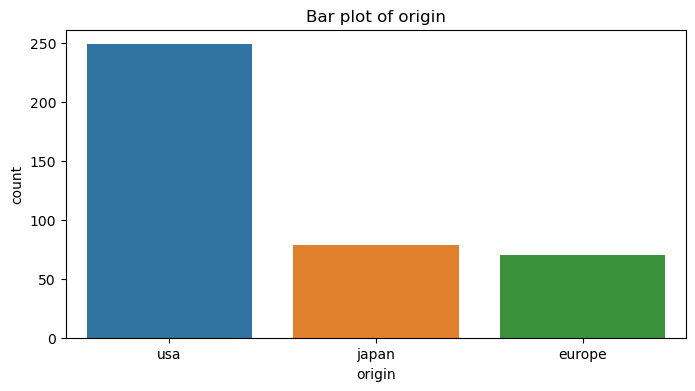

In [11]:
# Generate bar plots for categorical variables
plt.figure(figsize=(8, 4))
sns.countplot(x='origin', data=df)
plt.title('Bar plot of origin')
plt.show()

# Bivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


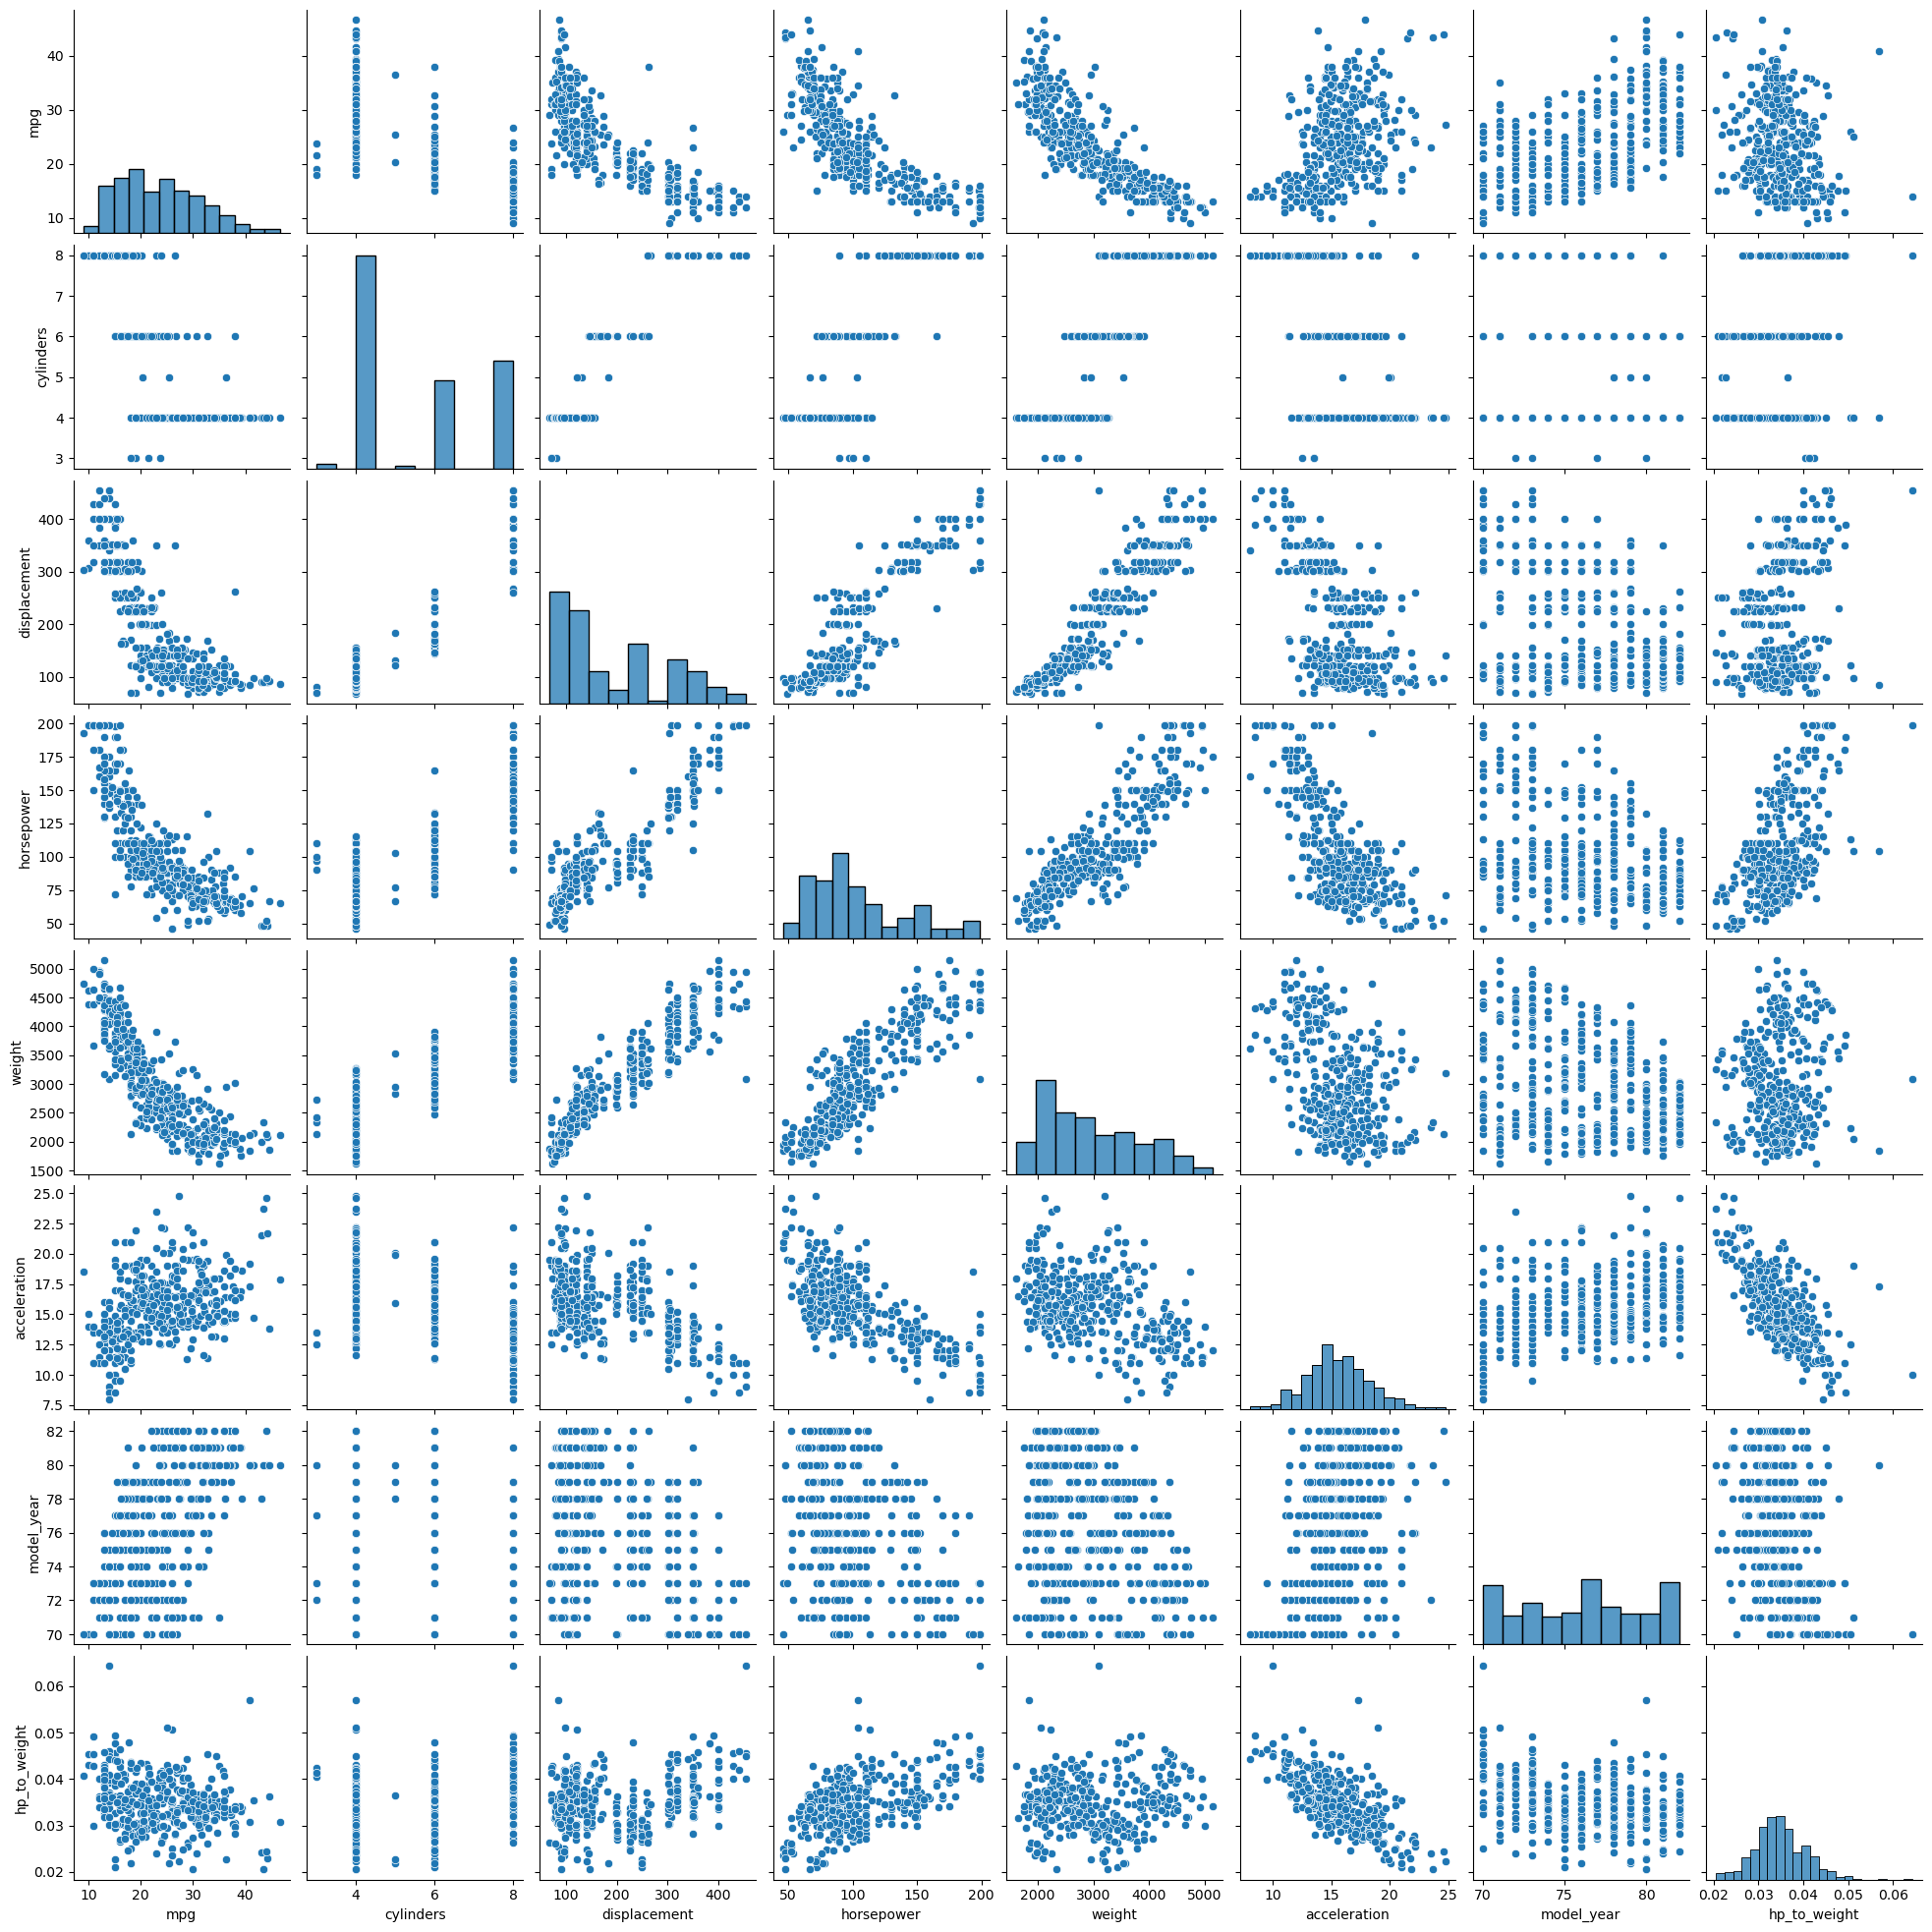

In [12]:
# Generate scatter plots for pairs of numerical variables
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'hp_to_weight']

sns.pairplot(df[num_cols])
plt.show()

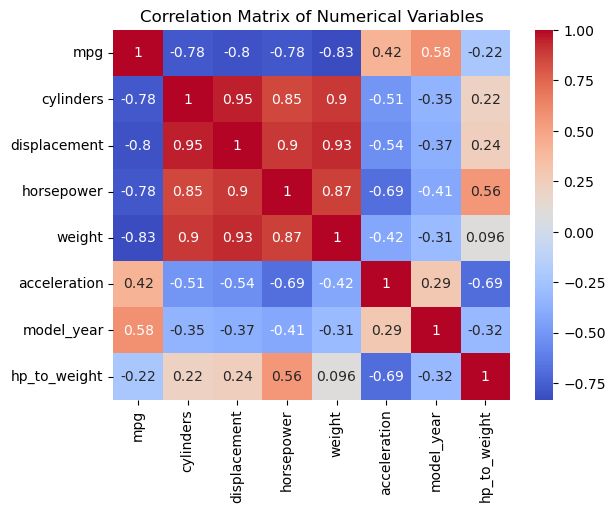

In [13]:
# Calculate correlation coefficients for pairs of numerical variables
corr_matrix = df[num_cols].corr()

# Display the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [14]:
group1 = df[df['origin'] == 'usa']['mpg']
group2 = df[df['origin'] == 'europe']['mpg']
group3 = df[df['origin'] == 'japan']['mpg']

# Conduct one-way ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Print the F-statistic and the p-value
print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

F-statistic: 98.54179491075871
p-value: 1.9154864184128e-35


# Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


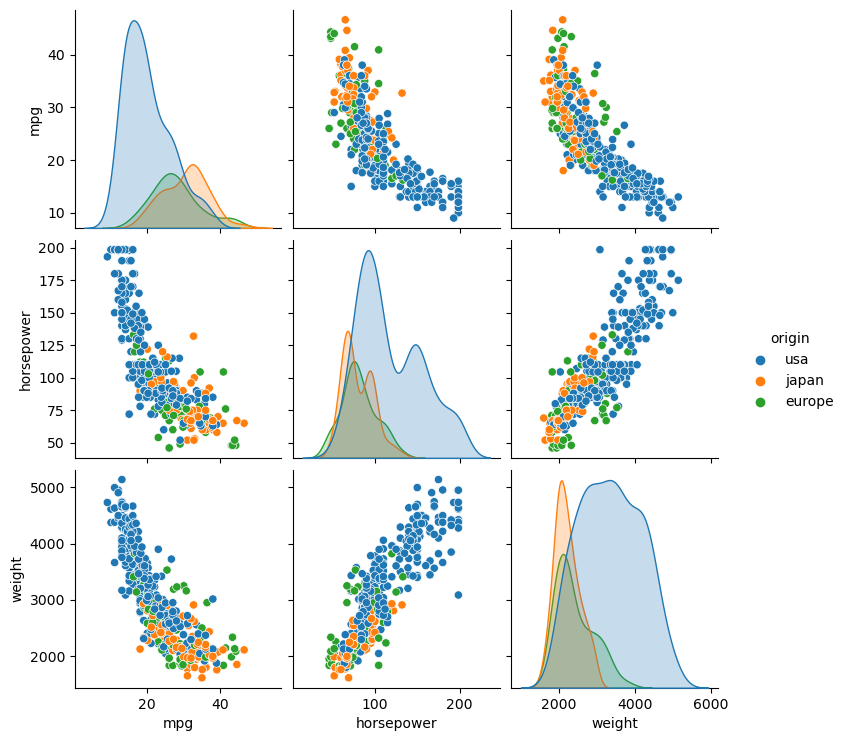

In [15]:
# Generate pair plots for a subset of variables
subset_cols = ['mpg', 'horsepower', 'weight', 'origin']
sns.pairplot(df[subset_cols], hue='origin')
plt.show()

# Temporal Analysis

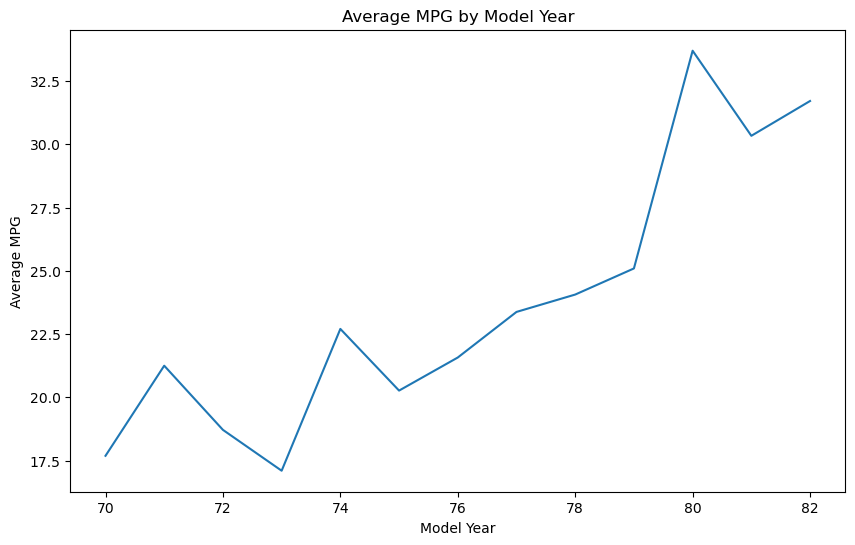

In [16]:
# Calculate the average mpg for each model year
avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()

# Plot the average mpg over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg_by_year)
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

# Hypothesis Testing

In [17]:
# Drop rows with missing 'mpg' values
df = df.dropna(subset=['mpg'])

# Split the data into two groups
group1 = df[df['model_year'] < 75]['mpg']  # Cars made before 1975
group2 = df[df['model_year'] >= 75]['mpg']  # Cars made in 1975 or later

# Conduct a two-sample t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(group1, group2)

# Print the t-statistic and the p-value
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

t-statistic: -9.408849098010085
p-value: 4.149293023078412e-19
